# Introduction 

## Employee Exit Analysis

This project will analyse exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The analysis seek to identify if;
-  employees who only worked for the institutes for a short period of time resign due to some kind of dissatisfaction? What about employees who have been there longer?

-  younger employees resign due to some kind of dissatisfaction? What about older employees?

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline 

# read in data
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

### Data Exploration

In [2]:
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [4]:
dete_survey['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [5]:
dete_survey['DETE Start Date'].value_counts()

Not Stated    73
2011          40
2007          34
2008          31
2010          27
2012          27
2009          24
2006          23
1975          21
1970          21
2013          21
1990          20
2005          20
1999          19
1996          19
2004          18
2000          18
1991          18
1992          18
1989          17
1988          15
2003          15
1978          15
1976          15
2002          15
1997          14
1980          14
1998          14
1995          14
1979          14
1974          14
1993          13
1986          12
1972          12
1977          11
1994          10
1969          10
2001          10
1971          10
1984          10
1981           9
1983           9
1973           8
1985           8
1987           7
1982           4
1963           4
1968           3
1967           2
1965           1
1966           1
Name: DETE Start Date, dtype: int64

In [6]:
dete_survey['Cease Date'].value_counts()

2012          344
2013          200
01/2014        43
12/2013        40
09/2013        34
Not Stated     34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
07/2014         2
02/2014         2
04/2014         2
04/2013         2
08/2012         2
11/2012         1
07/2012         1
2014            1
09/2010         1
09/2014         1
2010            1
07/2006         1
Name: Cease Date, dtype: int64

In [7]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [8]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

In [9]:
tafe_survey['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

In [10]:
tafe_survey['CESSATION YEAR'].value_counts()

2011.0    268
2012.0    235
2010.0    103
2013.0     85
2009.0      4
Name: CESSATION YEAR, dtype: int64

In [11]:
tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts()

Less than 1 year      147
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64

### Data Observation

##### The DETE data exploration process revealed;
- 822 rows and 56 columns
- Some of the columns contains missing values which are entered as 'Not Stated'
- There are three unique Resignation values 

##### The TAFE data exploration showed;
- 702 rows and 72 columns
- There is only a single Resignation value

The two datasets have similar columns that are relevant to this project yet labeled using different names.

Also, in both datasets, there are columns that are irrelevant to achieving the aim of the project.

# Data Cleaning

In [12]:
# read in DETE data and read in 'Not Stated' as 'NaN'
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

In [13]:
# drop irrelevant columns in both dataframes
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

### Drop Irrelevant Columns

In the two cells above;

- Read the DETE dataset again with all the missing values as NaN this time

- Irrelevant columns in both datasets dropped to maintain only relevant data for this project

In [14]:
# restructure column names - inconsistent structure
dete_survey_updated.columns = (dete_survey_updated.columns.
                               str.lower().
                               str.strip().
                               str.replace(' ', '_')
                              )
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [15]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [16]:
# rename TAFE dataframe column names - to be consistent with DETE dataframe column names
tafe_survey_updated.rename(columns={'Record ID': 'id', 
                                    'CESSATION YEAR': 'cease_date', 
                                    'Reason for ceasing employment': 'separationtype', 
                                    'Gender. What is your Gender?': 'gender', 
                                    'CurrentAge. Current Age': 'age', 
                                    'Employment Type. Employment Type': 'employment_status', 
                                    'Classification. Classification': 'position', 
                                    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 
                                    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}, 
                           inplace=True)


tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [17]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Renaming Columns

Columns in both datasets were renamed for standardization. This was necessary because the two datasets will be combined later for the aggregated analysis. The changes include;

- making all capitalization lower case
- replacing spaces with underscores
- renaming columns in TAFE datasets that are the same as in DETE to have the same name

In [18]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [19]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [20]:
# DETE 'separationtype' column has different resignation values - select all data with a 'separationtype' that starts with 'Resignation'
dete_resignations = (dete_survey_updated[dete_survey_updated['separationtype']
                                         .str.startswith('Resignation')]
                     .copy()
                    )

dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,810,Resignation-Other reasons,12/2013,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,Female,26-30,NaN,NaN,NaN,NaN,NaN
815,817,Resignation-Other employer,01/2014,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,21-25,NaN,NaN,NaN,NaN,NaN
816,818,Resignation-Move overseas/interstate,01/2014,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN


In [21]:
# select only data with Resignation as 'separationtype' 
tafe_resignations = (tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation']
                     .copy()
                    )

tafe_resignations

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,21 25,Temporary Full-time,Operational (OO),5-6,5-6
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2


#### Relevant data selection

Two new dataframes were created for both the TAFE and DETE surveys. Data containing only employees who resigned in the insititutions were isolated in these dataframes. 

Noteworthy is unlike in the TAFE survey, where there is only a single resignation value, DETE has three different types of resignation and all these three are selected.

In [22]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [23]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [24]:
# use the regex to extract the years in 'cease_date' 
pattern = r"([0-9]{4})"


dete_resignations['cease_date'] = (dete_resignations['cease_date']
                                   .str.extract(pattern)
                                   .astype(float)
                                  )

dete_resignations['cease_date'].value_counts(ascending = True)

2006.0      1
2010.0      2
2014.0     22
2012.0    129
2013.0    146
Name: cease_date, dtype: int64

In [25]:
dete_resignations['dete_start_date'].value_counts(ascending = True)

1963.0     1
1977.0     1
1973.0     1
1975.0     1
1987.0     1
1982.0     1
1984.0     1
1972.0     1
1971.0     1
1974.0     2
1976.0     2
1983.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1990.0     5
1993.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2006.0    13
2009.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [26]:
tafe_resignations['cease_date'].value_counts(ascending = True)

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

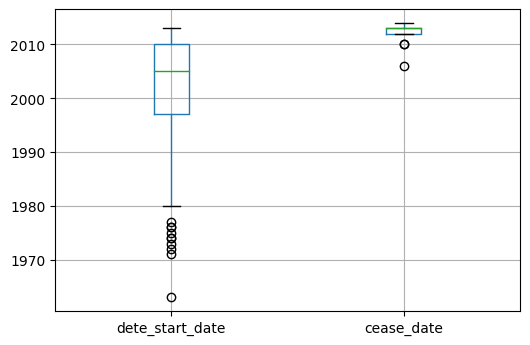

In [27]:
#check outliers in values 
dete_resignations.boxplot(column=['dete_start_date', 'cease_date'])
plt.show()

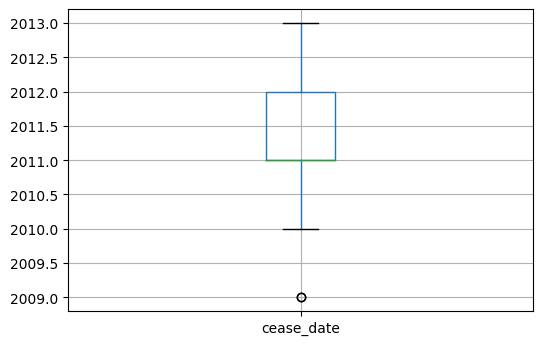

In [28]:
# check for outliers 
tafe_resignations.boxplot(column='cease_date')
plt.show()

### Observation

- Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date

- Given that most people in this field start working in their 20s, it's unlikely that the dete_start_date was before the year 1940


The checks showed there are no inconsistencies given the above stated parameters and there no values may be removed and the data can be used for the analysis. 

Years spent working in will be calculated next as there is no provision for that in DETE survey.

In [29]:
# get years of service by subtracting values in 'cease_date' from 'dete_start_date'
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

dete_resignations['institute_service'].value_counts(ascending = True)

31.0     1
49.0     1
34.0     1
38.0     1
35.0     1
41.0     1
27.0     1
42.0     1
33.0     1
29.0     1
36.0     2
30.0     2
25.0     2
26.0     2
28.0     2
32.0     3
21.0     3
19.0     3
39.0     3
24.0     4
11.0     4
23.0     4
18.0     5
16.0     5
12.0     6
17.0     6
14.0     6
22.0     6
10.0     6
15.0     7
20.0     7
8.0      8
13.0     8
7.0     13
2.0     14
9.0     14
4.0     16
6.0     17
0.0     20
3.0     20
1.0     22
5.0     23
Name: institute_service, dtype: int64

### Year(s) of Service 

A new column 'institute_service' was created in the DETE dataset to contain the data on employees' year(s) of service. This is necessary to ascertain the number of year(s) each employee spent in the workplace. This column will help to answer the first question of this project.

Next step is to identify factors that contribut to employee dissatisifaction

###  Employees Dissatisfaction Factors

Both datasets captured employee dissatisfaction using different columns (factors). In the TAFE dataset, two columns will be used to categorize employees as 'dissatisfied';

- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

In the DETE dataset however, a lot more columns is used;


-    job_dissatisfaction
-    dissatisfaction_with_the_department
-    physical_work_environment
-   lack_of_recognition
-   lack_of_job_security
-   work_location
-   employment_conditions
-   work_life_balance
-   workload



In [30]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [31]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [32]:
# define a function to update the values in the two TAFE dissatisfaction columns to True, False or NaN
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [33]:
# create a new 'dissatisfied' column to assign all the dissatisfaction factors columns
tafe_resignations['dissatisfied'] = (tafe_resignations[['Contributing Factors. Dissatisfaction', 
                                                       'Contributing Factors. Job Dissatisfaction']]
                                     .applymap(update_vals).any(axis=1, skipna=False)
                                    )


tafe_resignations_up = tafe_resignations.copy()

tafe_resignations['dissatisfied'].value_counts(dropna= False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [34]:
# create a new 'dissatisfied' column to assign all the dissatisfaction factors columns
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 
                                                       'dissatisfaction_with_the_department', 
                                                       'physical_work_environment', 
                                                       'lack_of_recognition', 'lack_of_job_security', 
                                                       'work_location', 
                                                       'employment_conditions', 
                                                       'work_life_balance', 
                                                       'workload']].any(axis=1, skipna=False)

dete_resignations_up = dete_resignations.copy()

dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

### Dissatisfied Employees

A new comlumn 'dissatisfied' was added in each of the dataframes to isolate data on employees who indicated at least one of the dissatisfaction factors caused them to resign. 

A copy of each of the dataframes was made for the isolated data.

The values in the 'dissatisfied' column of the updated DETE resignation dataframe contains Boolean; True or False. Subsequently, the values in the corresponding TAFE 'dissatisfied' column were converted to True, False or NaN. 

The 'dissatisfied' columns therefore contain;

- True: indicates an employee resigned because they were dissatisfied with the job
- False: indicates an employee resigned because of a reason other than dissatisfaction with the job
- NaN: indicates missing value ('tafe_resignations_up' only)


In [35]:
dete_resignations_up['institute'] = 'DETE'

dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,DETE
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True,DETE
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE


In [36]:
tafe_resignations_up['institute'] = 'TAFE'

tafe_resignations_up.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied,institute
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False,TAFE
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False,TAFE
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE


In [37]:
combined = (pd.concat([dete_resignations_up, tafe_resignations_up], 
                     ignore_index = True)
           )

combined.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute,Institute,WorkArea,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18,True,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15,True,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

In [39]:
combined.isnull().sum()

id                                                       0
separationtype                                           0
cease_date                                              16
dete_start_date                                        368
role_start_date                                        380
position                                                53
classification                                         490
region                                                 386
business_unit                                          619
employment_status                                       54
career_move_to_public_sector                           340
career_move_to_private_sector                          340
interpersonal_conflicts                                340
job_dissatisfaction                                    340
dissatisfaction_with_the_department                    340
physical_work_environment                              340
lack_of_recognition                                    3

In [40]:
# drop columns with more than 500 missing values
combined_updated = combined.dropna(thresh = 500, axis=1).copy()

combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(2), object(8)
memory usage: 51.0+ KB


In [41]:
combined_updated.isnull().sum()

id                    0
separationtype        0
cease_date           16
position             53
employment_status    54
gender               59
age                  55
institute_service    88
dissatisfied          8
institute             0
dtype: int64

### Combined Datasets Observations

- The two isolated dataframes were combined. Before then, a new column 'institute' containing the values DETE and TAFE for the DETE and TAFE dataframes respectively, to easily distinguish between the two datasets after combination.

- The combined dataframe contains columns which are not relevant for the analysis and these were subsequently dropped.

- Also, majority of the columns have missing values. This necessitates the next steps to follow in the data cleaning process. 

###  'institute_service' Column Data Cleaning

This step involves cleaning the **'institute_service'** column. In an article by [Business Wire](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), who proposed an age structure, it was stipulated that, understanding employee's needs by career stage instead of age is more effective.

For the purposes of this analysis, a modified version of the age structure by Business Wire was adopted. The structure will be used to categorize the employees year(s) of service as found in **'institute_service'** column. The modified structure to be used for the categorization is below; 


- **New**: Less than 3 years at a company
- **Experienced**: 3-6 years at a company
- **Established**: 7-10 years at a company
- **Veteran**: 11 or more years at a company



In [42]:
combined_updated['institute_service'].value_counts(dropna = False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


In [43]:
# values in 'institute_service' column are inconsistent - use regex to capture years for consistency
yrs_pattern = r'(\d+)'

combined_updated['institute_service'] = (combined_updated['institute_service']
                                         .astype('str')
                                         .str.extract(yrs_pattern)
                                         .astype('float')
                                        )


combined_updated['institute_service'].value_counts(dropna = False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [44]:
# define function to categorize career stages
def career_stage(yrs):
    if pd.isnull(yrs):
        return np.nan
    elif yrs < 3:
        return 'New'
    elif yrs >= 3 and yrs <= 6:
        return 'Experienced'
    elif yrs >= 7 and yrs <= 10:
        return 'Established'
    else:
        return 'Veteran'
    

combined_updated['service_cat'] = (combined_updated['institute_service']
                                   .apply(career_stage)
                                  )

combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [45]:
combined_updated['service_cat'].ffill(inplace=True)

combined_updated['service_cat'].value_counts(dropna=False)

New            223
Experienced    200
Veteran        154
Established     74
Name: service_cat, dtype: int64

### Observations

The following are the observations in the 'institute_service' column

- The 'institute_service' column contains a significant number of missing values (88)

- Also, there are inconsistencies as it contains values in different forms representing years of service. This is because the institutions used different questionnaires

To address these; the following measures were taken to clean the column;

- The years were extracted from each value in the column
- Each extracted value was mapped to one of the career stage mentioned earlier
- The values in the career stage was assigned to a new column ('service_cat')
- Subsequently, missing values were filled by propagating last valid observation forward to next

### 'dissatisfied' Column Data Cleaning

In [46]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [47]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

### Observation

Before cleaning the 'dissatisfied' column, there were missing values. The percentage of the missing values account for quite an insignificant proportion of the total values (8 of 651).  Hence, the missing values will be filled using the most occuring value in the column which is 'False'.

### 'age' Column Data Cleaning

The age category as proposed by [Israel Ogunmola](https://community.dataquest.io/u/israelogunmola) in his project will be used. 

In [48]:
combined_updated['age'].value_counts(dropna = False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
36  40           32
31  35           32
31-35            29
21-25            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [49]:
combined_updated['age'].ffill(inplace=True)

combined_updated['age'].value_counts(dropna=False)

51-55            77
41  45           53
46  50           50
41-45            48
46-50            42
36-40            42
31  35           39
26  30           38
21  25           37
26-30            35
36  40           34
56 or older      33
31-35            32
21-25            29
56-60            27
61 or older      24
20 or younger    11
Name: age, dtype: int64

In [50]:
# convert age column to string datatype, format and restructure its characters 
combined_updated['age'] = (combined_updated['age'].astype('str').
                           str.replace('  ','-').
                           str.replace('61 or older', '56 or older').
                           str.replace('56-60', '56 or older')
                          )

combined_updated['age'].value_counts(dropna = False)

41-45            101
46-50             92
56 or older       84
51-55             77
36-40             76
26-30             73
31-35             71
21-25             66
20 or younger     11
Name: age, dtype: int64

In [51]:
# create an age category for the age
age_structure = {'20 or younger': 'Early Working Age',
                '21-25': 'Early Working Age',
                '26-30': 'Prime Working Age',
                '31-35': 'Prime Working Age',
                '36-40': 'Prime Working Age',
                '41-45': 'Prime Working Age',
                '46-50': 'Prime Working Age',
                '51-55': 'Prime Working Age',
                '56 or older': 'Mature Working Age'}

# map age structure the structure to the age column
combined_updated['age_cat'] = combined_updated['age'].map(age_structure)


combined_updated['age_cat'].value_counts()

Prime Working Age     490
Mature Working Age     84
Early Working Age      77
Name: age_cat, dtype: int64

### Age Observations

- The first observation in the age column is the significant number of missing values (55 missing values)

- The missing values were filled by propogating the last valid observation forward to next. With this method, relevant data will not be lost which could affect analysis

- Moreover, the values in the column are in a range of 5 but in incosistent structure. Some of the ranges are hyphenated whiles others are separated by whitespaces. All the ranges were subsequently hyphenated for consistency

- Also, all values above 55 were replaced with '56 or older'. This is to improve consistency 

- Finally, the age were categorized into three categories; Early, Prime and Mature working ages and assigned to a new column 'age_cat'

# Data Analysis

In [52]:
# define a function to generate pivot table
def pv_table(df, index_col, values_col):
    table = (df.pivot_table(index = index_col, 
                            values = values_col)
            )
    table[values_col] = round(table[values_col] * 100)      
    return table

# define a function to plot chart
def plot_chart(table, main_title = None):
    char = table.plot(kind = 'bar', 
                      legend = False, 
                      rot = 30)
    plt.xlabel(None)
    plt.ylabel('Percentage %')
    
    return char

### Analysis by Service Category

In [53]:
combined_cat_pv = pv_table(combined_updated, 'service_cat', 'dissatisfied')

combined_cat_pv

,dissatisfied
service_cat,
Established,49.0
Experienced,34.0
New,30.0
Veteran,45.0


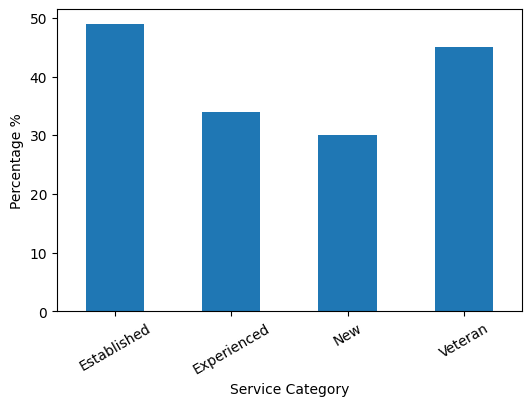

In [54]:
char = plot_chart(combined_cat_pv, main_title = 'Percentage of dissatisfied employess in each category')
plt.xlabel('Service Category')
char

### Analysis by Service Category Observations


- The chart shows ~ 49% of "Established" employees resigned due to some kind of dissatisfaction while ~ 45% of "Veteran" employees did same. Meanwhile, around 34 % and 30 % of "Experienced" and "New" employees respectively resigned due to some kind of dissatisfaction. 

- Based on the statistics above, generally, employees with more than 7 years of service in the institutions resigned more due to some kind of dissatisfaction. 

- Whiles, those employees with less than 7 years resigned less.


### Analysis by Age

In [55]:
combined_age_pv = pv_table(combined_updated, 'age', 'dissatisfied')

combined_age_pv

,dissatisfied
age,
20 or younger,27.0
21-25,29.0
26-30,40.0
31-35,38.0
36-40,33.0
41-45,37.0
46-50,37.0
51-55,43.0
56 or older,39.0


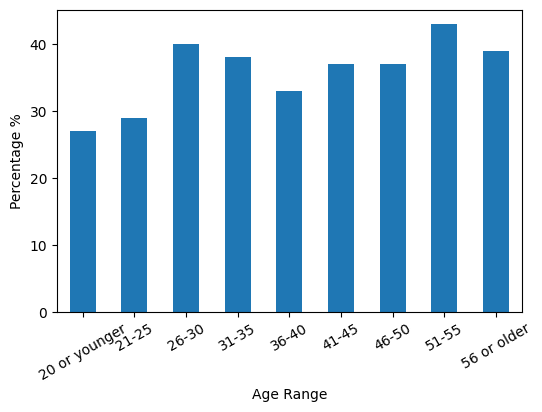

In [56]:
char = plot_chart(combined_age_pv, main_title = 'Percentage of dissatisfied employess according to age')
plt.xlabel('Age Range')
char

### Analysis by Age Observations

The following observations were made after the analysis of the 'age' column;

- The employees between the ages of 51-55 resigned the most due to some kind of dissatisfaction

- This is followed closely by the employees between 26-30.

- However, the employees that resigned the least are those 20 years or younger

### Analysis by Age Categories

In [57]:
combined_age_cat = pv_table(combined_updated, 'age_cat', 'dissatisfied')


combined_age_cat

,dissatisfied
age_cat,
Early Working Age,29.0
Mature Working Age,39.0
Prime Working Age,38.0


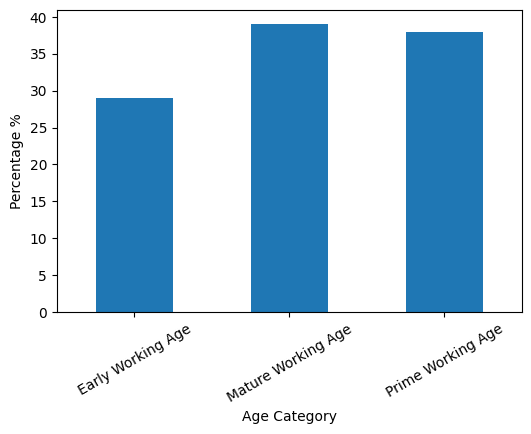

In [58]:
char = plot_chart(combined_age_cat, main_title = 'Percentage of dissatisfied employess according to age')
plt.xlabel('Age Category')
char

### Analysis by Age Structure Categories

- The above chart shows ~39% of "Mature Working Age"  and ~38% of "Prime Working Age" employees resigned due to some kind of dissatisfaction. At the same time,  ~29% "Early Working Age" employees resigned. 

### Analysis by Institute

In [59]:
combined_inst_pv = pv_table(combined_updated, 'institute', 'dissatisfied')

combined_inst_pv

,dissatisfied
institute,
DETE,48.0
TAFE,27.0


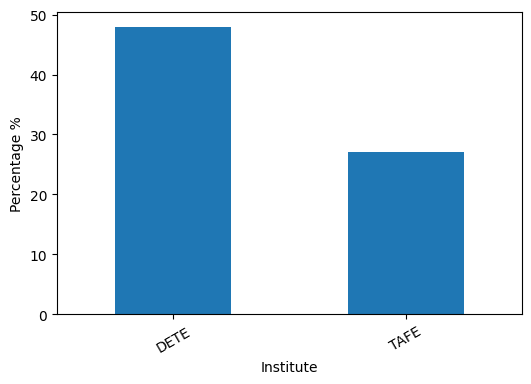

In [60]:
char = plot_chart(combined_inst_pv, main_title = 'Percentage of dissatisfied employess according to institute')
plt.xlabel('Institute')
char

### Analysis by Institution Observations

- Approximately 48% of DETE employees resigned due to some kind of dissatisfaction

- While around 27% of TAFE employees resigned

## Conclusion

In this project, employees were surveyed to identify reasons why they exit the institutions. These surveys were carried out on Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. Using the data from these two different institutions, the purpose of this project is to analyse and ascertain if;

-  employees who only worked for the institutes for a short period of time resign due to some kind of dissatisfaction? What about employees who have been there longer?

-  younger employees resign due to some kind of dissatisfaction? What about older employees?
 
 
After cleaning and analysing the data, it appears that;

- Employees who worked for more than 7 years in the institutes resigned the most due to some kind of dissatisfaction

- Also, employees between 26 and 55 years resigned the most. This could be as a result of the large number of employees in this age bracket
